## 주성분 분석 - PCA

- 차원 축소 기술
- 정보 손실을 최소화하면서 데이터를 압축
- 주성분은 다음 단계의 지도학습에 사용됨
- 수백 차원의 데이터 구조는 이해하기 힘들므로 2차원이나 3차원으로 관측값의 차원을 축소해 시각적으로 이해하기 쉽도록 도와줌
- 고유벡터와 고유값 개념 필요

<h3> $A\vec{v} = \lambda\vec{v} $ </h3>
$ \vec{v} $는 고유 벡터, $ A $는 정방 행렬, $ \lambda $는 고유값

## 기본 원리로 본 PCA 작동 기법

In [33]:
# 데이터 프레임 만들기
import pandas as pd
pca_df = pd.DataFrame(
    data = {
        '점': [i for i in range(1,11)],
        'X' : [0.72, 0.18, 2.50, 0.45, 0.04, 0.13, 0.30, 2.65, 0.91, 0.46],
        'Y' : [0.13, 0.23, 2.30, 0.16, 0.44, 0.24, 0.03, 2.10, 0.91, 0.32]
    },
    columns = ['점','X','Y']
)
pca_df.index = pca_df['점']
pca_df = pca_df.drop('점', axis = 1)

In [34]:
# 데이터 확인
pca_df

,X,Y
점,,
1,0.72,0.13
2,0.18,0.23
3,2.50,2.30
4,0.45,0.16
5,0.04,0.44
6,0.13,0.24
7,0.30,0.03
8,2.65,2.10
9,0.91,0.91


In [35]:
# 데이터 프레임 확인하기
pca_df

,X,Y
점,,
1,0.72,0.13
2,0.18,0.23
3,2.50,2.30
4,0.45,0.16
5,0.04,0.44
6,0.13,0.24
7,0.30,0.03
8,2.65,2.10
9,0.91,0.91


In [37]:
# 편차 구하기
pca_df['편차_x'] = pca_df['X'] - round(pca_df['X'].sum() / len(pca_df['X']), 2)
pca_df['편차_y'] = pca_df['Y'] - round(pca_df['Y'].sum() / len(pca_df['Y']), 2) 

In [38]:
# 데이터 확인
pca_df

,X,Y,편차_x,편차_y
점,,,,
1,0.72,0.13,-0.11,-0.56
2,0.18,0.23,-0.65,-0.46
3,2.50,2.30,1.67,1.61
4,0.45,0.16,-0.38,-0.53
5,0.04,0.44,-0.79,-0.25
6,0.13,0.24,-0.70,-0.45
7,0.30,0.03,-0.53,-0.66
8,2.65,2.10,1.82,1.41
9,0.91,0.91,0.08,0.22


### 두 가지 기법을 사용해 주성분을 계산
- 데이터의 공분산 행렬
- 특이값 분해

### 여기서는 공분산 행렬을 이용

In [47]:
# 공분산 구하기
matrix_cov = pca_df[['X', 'Y']].cov()

In [53]:
# 고유벡터와 고유값 구하기
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(matrix_cov)

In [70]:
# 차원 낮추기 => X,Y를 주성분 벡터로의 투영
np.matmul(np.array(pca_df[['편차_x', '편차_y']]), eigenvectors[:,0].reshape(2,1))

array([[-0.45009006],
       [-0.79242062],
       [ 2.31650969],
       [-0.6343627 ],
       [-0.76053677],
       [-0.82363244],
       [-0.832857  ],
       [ 2.29873262],
       [ 0.20460571],
       [-0.52195075]])

### 결론
- 주성분 1의 고유값 : 1.5725 => 원래의 변수에 비해 57% 이상의 변이가 생겼다는 것을 알 수 있음

## scikit-learn을 활용한 필기체 숫자 인식에 pca 적용
- 데이터에는 0 ~ 9 사이의 필기체 64개의 픽셀 강도값을 가진 특징값이 들어 있다.

In [88]:
# 데이터 가져오기
from sklearn.datasets import load_digits
digits = load_digits()

In [89]:
# 데이터 분할
X = digits.data
y = digits.target

In [90]:
# 데이터 shape 확인
X.shape, y.shape

((1797, 64), (1797,))

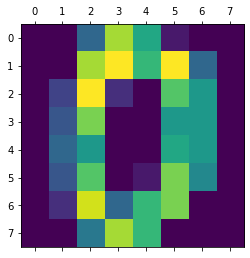

In [91]:
# 데이터 샘플 확인하기
import matplotlib.pyplot as plt
plt.matshow(X[0].reshape(8,8))
plt.show()

In [94]:
# 주성분 분석을 하기 위해서는 스케일링이 필요하다
from sklearn.preprocessing import scale
X_scale = scale(X, axis = 0)

In [98]:
# 모델 생성하기
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # n_components : 주성분 개수
reduced_X = pca.fit_transform(X_scale)

In [102]:
# 데이터 확인
reduced_X.shape

(1797, 2)

In [114]:
zero_x = list()
one_x = list()
two_x = list()
three_x = list()
four_x = list()
five_x = list()
six_x = list()
seven_x = list()
eight_x = list()
nine_x = list()

In [115]:
zero_y = list()
one_y = list()
two_y = list()
three_y = list()
four_y = list()
five_y = list()
six_y = list()
seven_y = list()
eight_y = list()
nine_y = list()

In [116]:
# 각 숫자에 개별적으로 관련 주성분을 추가해 10개의 숫자 모두에 관해 산포도를 그린다
for i in range(len(reduced_X)):
    if y[i] == 0:
        zero_x.append(reduced_X[i][0])
        zero_y.append(reduced_X[i][1])
    elif y[i] == 1:
        one_x.append(reduced_X[i][0])
        one_y.append(reduced_X[i][1])
    elif y[i] == 2:
        two_x.append(reduced_X[i][0])
        two_y.append(reduced_X[i][1])
    elif y[i] == 3:
        three_x.append(reduced_X[i][0])
        three_y.append(reduced_X[i][1])
    elif y[i] == 4:
        four_x.append(reduced_X[i][0])
        four_y.append(reduced_X[i][1])
    elif y[i] == 5:
        five_x.append(reduced_X[i][0])
        five_y.append(reduced_X[i][1])
    elif y[i] == 6:
        six_x.append(reduced_X[i][0])
        six_y.append(reduced_X[i][1])
    elif y[i] == 7:
        seven_x.append(reduced_X[i][0])
        seven_y.append(reduced_X[i][1])
    elif y[i] == 8:
        eight_x.append(reduced_X[i][0])
        eight_y.append(reduced_X[i][1])
    elif y[i] == 9:
        nine_x.append(reduced_X[i][0])
        nine_y.append(reduced_X[i][1])

Text(0, 0.5, 'PC 2')

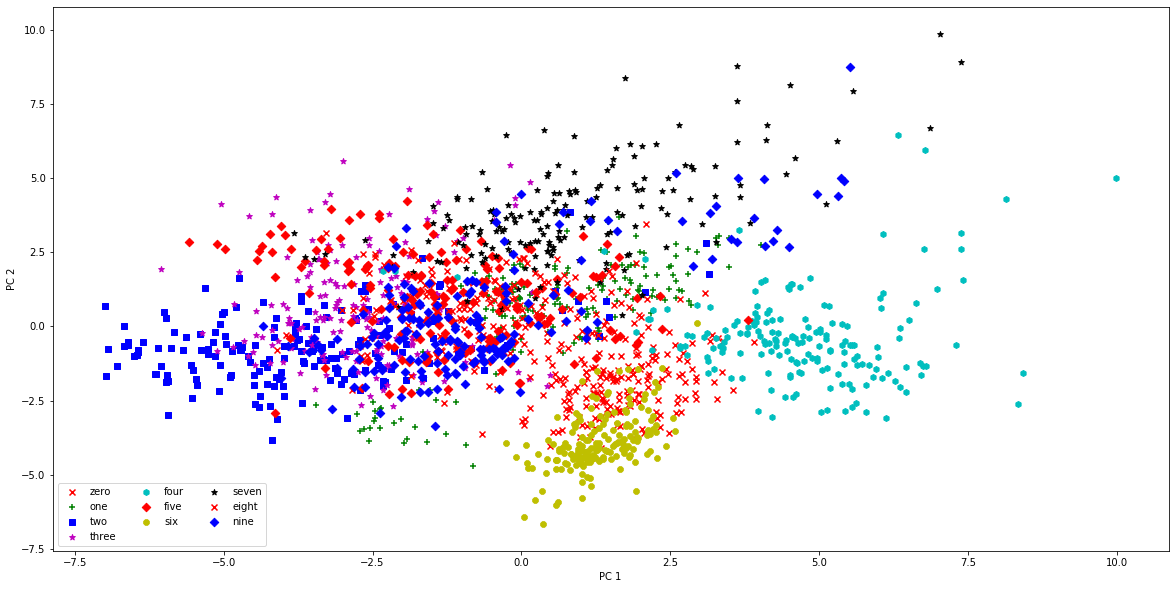

In [119]:
# 산포도 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
zero = plt.scatter(zero_x, zero_y, c='r', marker = 'x', label = 'zero')
one = plt.scatter(one_x, one_y, c='g', marker = '+')
two = plt.scatter(two_x, two_y, c='b', marker = 's')
three = plt.scatter(three_x, three_y, c='m', marker = '*')
four = plt.scatter(four_x, four_y, c='c', marker = 'h')
five = plt.scatter(five_x, five_y, c='r', marker = 'D')
six = plt.scatter(six_x, six_y, c='y', marker = '8')
seven = plt.scatter(seven_x, seven_y, c='k', marker = '*')
eight = plt.scatter(eight_x, eight_y, c='r', marker = 'x')
nine = plt.scatter(nine_x, nine_y, c='b', marker = 'D')

plt.legend((zero, one, two, three, four, five, six, seven, eight, nine), ('zero','one','two','three','four','five','six','seven','eight','nine')
          , scatterpoints = 1, loc = 'lower left', ncol = 3, fontsize = 10)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [121]:
# 2차원만으로 모든 변이를 표현하지 못할 수 있다.
# 3차원 자료
pca_3d = PCA(n_components=3)
reduced_X3D = pca_3d.fit_transform(X_scale)

In [123]:
# 데이터 확인
reduced_X3D.shape

(1797, 3)

In [124]:
zero_x = list()
one_x = list()
two_x = list()
three_x = list()
four_x = list()
five_x = list()
six_x = list()
seven_x = list()
eight_x = list()
nine_x = list()

In [125]:
zero_y = list()
one_y = list()
two_y = list()
three_y = list()
four_y = list()
five_y = list()
six_y = list()
seven_y = list()
eight_y = list()
nine_y = list()

In [126]:
zero_z = list()
one_z = list()
two_z = list()
three_z = list()
four_z = list()
five_z = list()
six_z = list()
seven_z = list()
eight_z = list()
nine_z = list()

In [127]:
# 각 숫자에 개별적으로 관련 주성분을 추가해 10개의 숫자 모두에 관해 산포도를 그린다
for i in range(len(reduced_X)):
    if y[i] == 0:
        zero_x.append(reduced_X3D[i][0])
        zero_y.append(reduced_X3D[i][1])
        zero_z.append(reduced_X3D[i][2])
    elif y[i] == 1:
        one_x.append(reduced_X3D[i][0])
        one_y.append(reduced_X3D[i][1])
        one_z.append(reduced_X3D[i][2])
    elif y[i] == 2:
        two_x.append(reduced_X3D[i][0])
        two_y.append(reduced_X3D[i][1])
        two_z.append(reduced_X3D[i][2])
    elif y[i] == 3:
        three_x.append(reduced_X3D[i][0])
        three_y.append(reduced_X3D[i][1])
        three_z.append(reduced_X3D[i][2])
    elif y[i] == 4:
        four_x.append(reduced_X3D[i][0])
        four_y.append(reduced_X3D[i][1])
        four_z.append(reduced_X3D[i][2])
    elif y[i] == 5:
        five_x.append(reduced_X3D[i][0])
        five_y.append(reduced_X3D[i][1])
        five_z.append(reduced_X3D[i][2])
    elif y[i] == 6:
        six_x.append(reduced_X3D[i][0])
        six_y.append(reduced_X3D[i][1])
        six_z.append(reduced_X3D[i][2])
    elif y[i] == 7:
        seven_x.append(reduced_X3D[i][0])
        seven_y.append(reduced_X3D[i][1])
        seven_z.append(reduced_X3D[i][2])
    elif y[i] == 8:
        eight_x.append(reduced_X3D[i][0])
        eight_y.append(reduced_X3D[i][1])
        eight_z.append(reduced_X3D[i][2])
    elif y[i] == 9:
        nine_x.append(reduced_X3D[i][0])
        nine_y.append(reduced_X3D[i][1])
        nine_z.append(reduced_X3D[i][2])

Text(0.5, 0, 'PC 3')

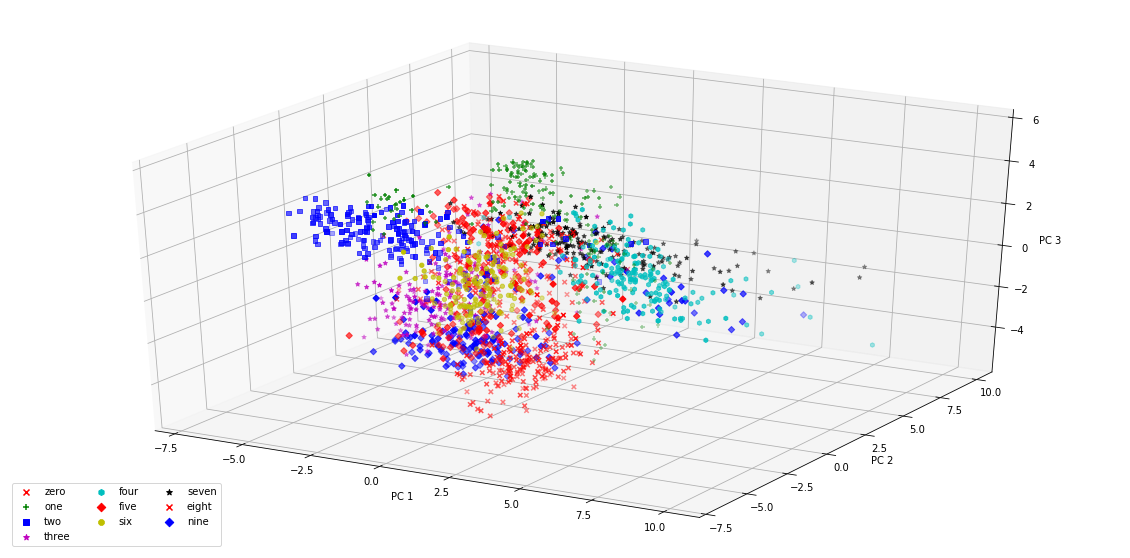

In [130]:
# 산포도 그리기
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(zero_x, zero_y, zero_z, c='r', marker = 'x', label = 'zero')
ax.scatter(one_x, one_y, one_z, c='g', marker = '+', label = 'one')
ax.scatter(two_x, two_y, two_z, c='b', marker = 's', label = 'two')
ax.scatter(three_x, three_y, three_z, c='m', marker = '*', label = 'three')
ax.scatter(four_x, four_y, four_z, c='c', marker = 'h', label = 'four')
ax.scatter(five_x, five_y, five_z, c='r', marker = 'D', label = 'five')
ax.scatter(six_x, six_y, six_z, c='y', marker = '8', label = 'six')
ax.scatter(seven_x, seven_y, seven_z, c='k', marker = '*', label = 'seven')
ax.scatter(eight_x, eight_y, eight_z, c='r', marker = 'x', label = 'eight')
ax.scatter(nine_x, nine_y, nine_z, c='b', marker = 'D', label = 'nine')

plt.legend((zero, one, two, three, four, five, six, seven, eight, nine), ('zero','one','two','three','four','five','six','seven','eight','nine')
          , scatterpoints = 1, loc = 'lower left', ncol = 3, fontsize = 10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

### 클러스터의 개수를 결정할 두 가지 기준
- 전체 설명된 분산이 미미하게 감소하기 시작하는 시점
- 설명된 분산이 전체의 80% 이상일 경우

In [ ]:
# 